In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

import joblib
from configparser import ConfigParser

In [26]:
config_file = ConfigParser()
config_file.read('./config.ini')
print(config_file.sections())
CONFIG_PARAMS = config_file['MAIN']

['MAIN']


In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

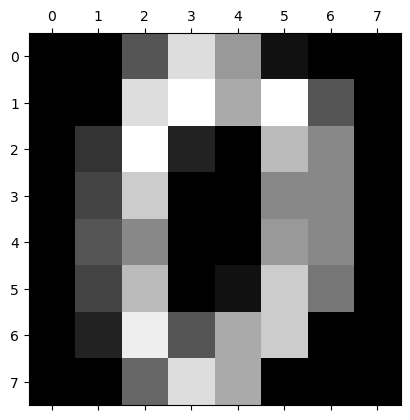

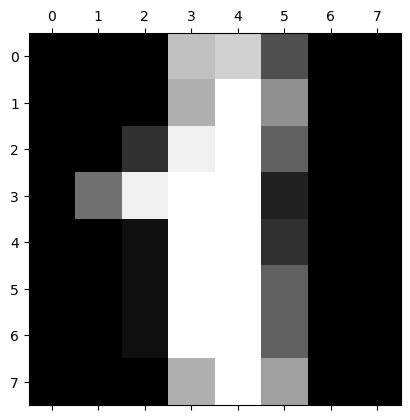

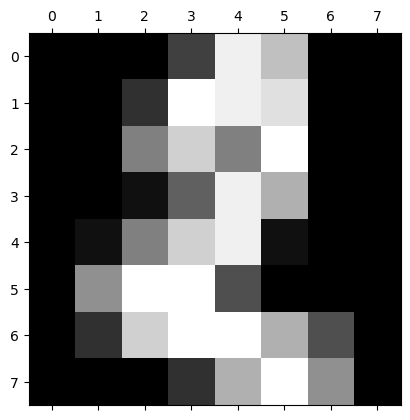

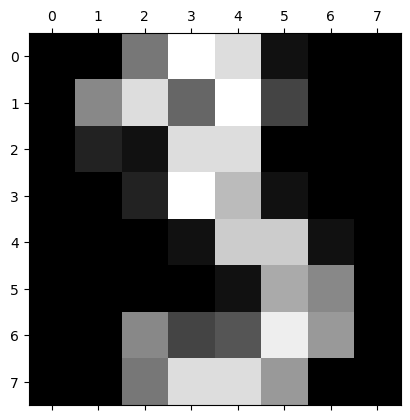

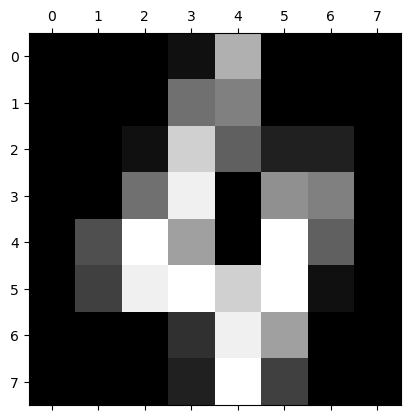

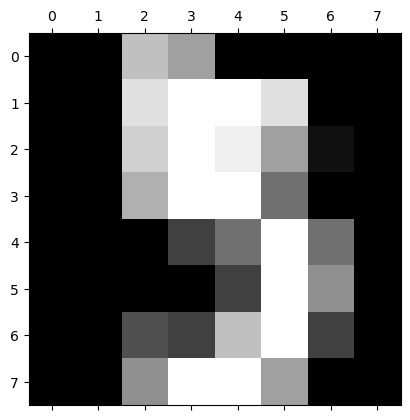

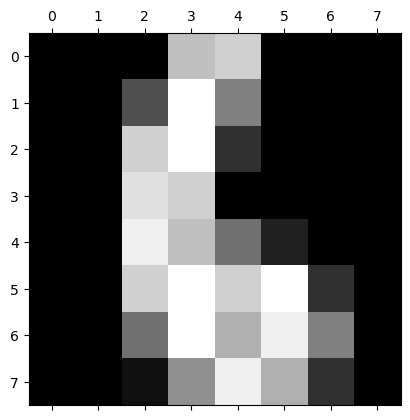

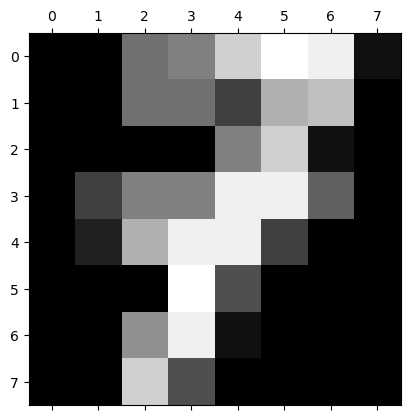

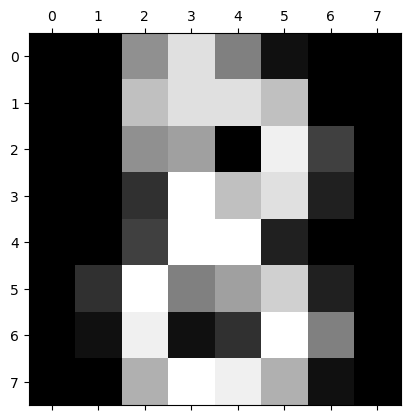

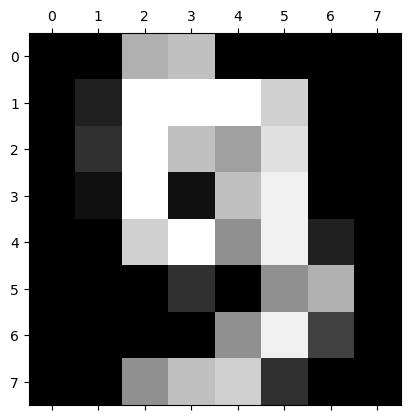

In [6]:
plt.gray()
for i in range(10) :
    plt.matshow(digits.images[i])
    plt.show()

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [9]:
TEST_SIZE = 0.2
X_train,X_test,y_train,y_test = train_test_split(digits.data , digits.target, test_size= float(CONFIG_PARAMS['TEST_SIZE']))

In [12]:

model = LogisticRegression(max_iter= int(CONFIG_PARAMS['MAX_ITERATIONS']))

In [13]:
model.fit(X_train , y_train)

LogisticRegression(max_iter=10000)

In [14]:
model.score(X_test , y_test)

0.9611111111111111

Testing the model

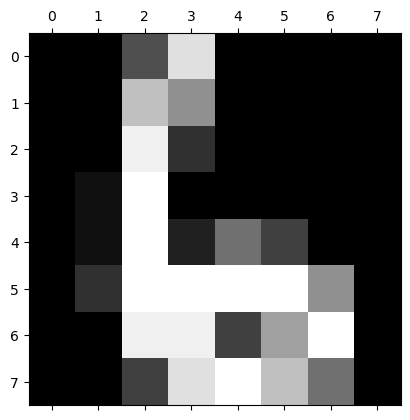

In [15]:
RANDOM_IMAGE_SAMPLE = 67
plt.matshow(digits.images[RANDOM_IMAGE_SAMPLE])
plt.show()

In [16]:
digits.target[67]

6

In [17]:
model.predict([digits.data[RANDOM_IMAGE_SAMPLE]])


array([6])

In [18]:
model.predict(digits.data[:5])


array([0, 1, 2, 3, 4])

In [19]:
y_pred = model.predict(X_test)

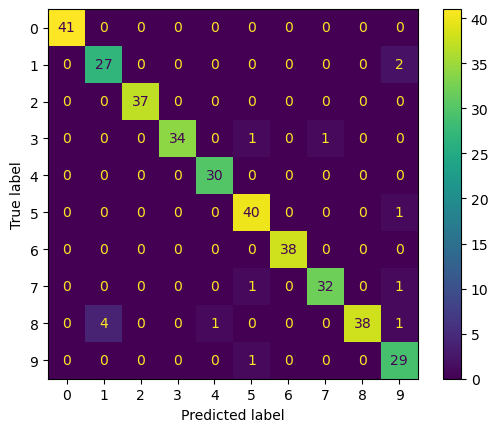

In [20]:
cm = confusion_matrix(y_test , y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

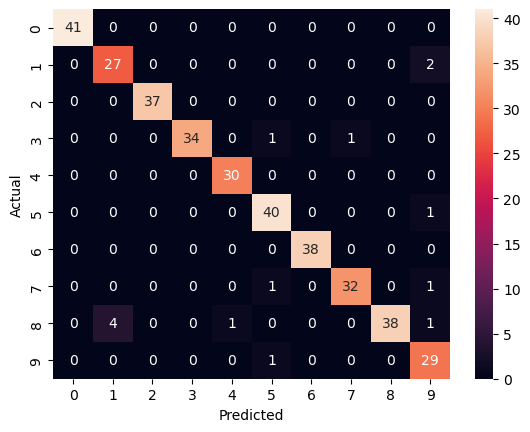

In [21]:
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Saving the model

In [22]:
joblib.dump(model,CONFIG_PARAMS['MODEL_SAVE_PATH'])

['./digit_recognition_model']

Loading the model

In [23]:
model = joblib.load(CONFIG_PARAMS['MODEL_LOAD_PATH'])

In [24]:
y_pred = model.predict(X_train)

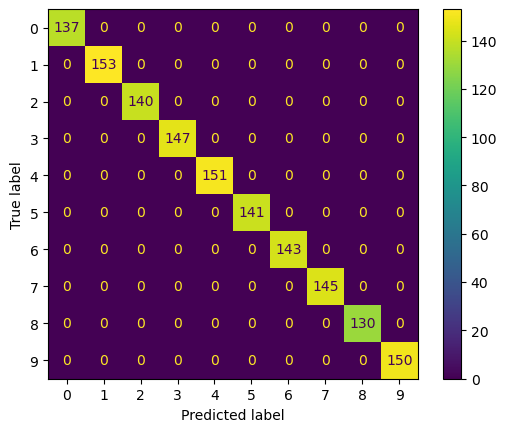

In [25]:
cm = confusion_matrix(y_train , y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()